# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 11__

__Nombres de los estudiantes: Javier Gómez Moraleda y Mario Alcolea Alcolea__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [1]:
import numpy as np
import pandas as pd

# Utilizamos el lector csv, cuyos valores aparecen separados por comas
df = pd.read_csv('cleveland.csv', delimiter=',')

# Indicamos las variables categóricas
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')

# Eliminamos aquellas filas a las que les faltan valores
df = df.dropna()

# Creamos una copia del dataframe original para el futuro
df_orig = df.copy()

# Mostramos la tabla resultante
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [2]:
# Creamos una nueva columna target2 inicializado a Normal
df['target2'] = 'Normal'

# Si el valor de target es distinto de 0, significa que el individuo está enfermo
df.loc[df['target'] != 0, 'target2'] = 'Enfermo'

# Eliminamos la columna 'target' utilizando la operación drop
df = df.drop(['target'], axis=1)

# Renombramos la columna 'target2' a 'target'
df = df.rename(columns={'target2': 'target'})

# Indicamos que 'target' es categórica
df['target'] = df['target'].astype('category')

# Mostramos la tabla resultante
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,Normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,Enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,Enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,Normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,Enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,Enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,Enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,Enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

### Clases equilibradas ###

In [3]:
# Número de ejemplos en cada clase
df['target'].value_counts()

Normal     160
Enfermo    137
Name: target, dtype: int64

In [4]:
# Frecuencia de las clases
df['target'].value_counts() / df['target'].count() * 100

Normal     53.872054
Enfermo    46.127946
Name: target, dtype: float64

En nuestro caso, el número de personas normales es mayor al de personas enfermas, pero como tenemos aproximadamente un 50% de cada clase, no vamos a tenerlo en cuenta.

### Rangos y distribuciones de las variables númericas ###
Primero vamos a mostrar los datos estádisticos de las variables numéricas y las gráficas con las frecuencias para obtener la mayor información posible.

In [5]:
# Mostramos los datos estadísticos de cada variable numérica de la tabla
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


##### Edad (age) #####

<AxesSubplot:ylabel='Frequency'>

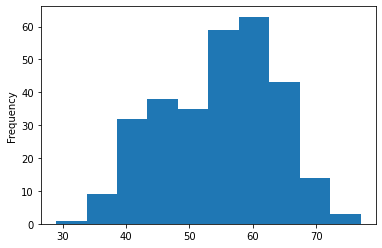

In [6]:
# Histograma de la edad
df['age'].plot.hist()

El rango de la variable edad oscila entre 29 y 77 años. Como podemos ver en la gráfica, el pico de la frecuencia se encuentra en torno a los 60 años y su media en 54.54 años. 

##### Presión arterial en reposo (trestbps) #####

<AxesSubplot:ylabel='Frequency'>

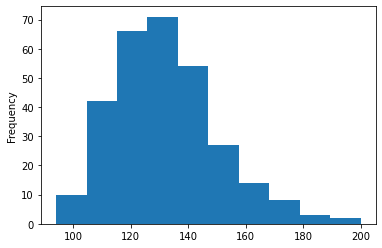

In [7]:
# Histograma de la presion arterial en reposo
df['trestbps'].plot.hist()

El rango de la presión arterial se encuentra entre 94 y 200 mm Hg. Como podemos ver en la gráfica, el pico de la frecuencia se encuentra en torno a 130 mmHg y su media en 131.69 mm Hg. 

##### Colésterol (chol) #####

<AxesSubplot:ylabel='Frequency'>

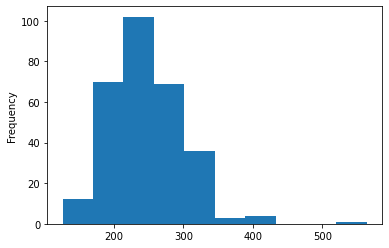

In [8]:
# Histograma de la presion arterial en reposo
df['chol'].plot.hist()

El rango del colesterol se encuentra entre 126 y 564 mg/dl. Como podemos ver en la gráfica, el pico de la frecuencia se encuentra en torno a 250 mg/dl y su media en 247.35 mg/dl. 

##### Frecuencia cardíaca máxima alcanzada (thalach) #####

<AxesSubplot:ylabel='Frequency'>

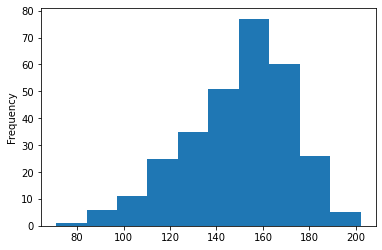

In [9]:
# Histograma de la frecuencia cardíaca máxima
df['thalach'].plot.hist()

El rango del colesterol se encuentra entre 71 y 202. Como podemos ver en la gráfica, el pico de la frecuencia se encuentra en torno a 150 y su media en 149.59. 

##### Depresión ST inducida por el ejercicio en relación al reposo (oldpeak) #####

<AxesSubplot:ylabel='Frequency'>

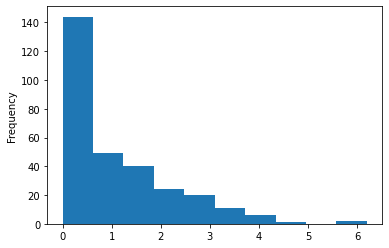

In [10]:
# Histograma de oldpeak
df['oldpeak'].plot.hist()

El rango de esta variable se encuentra entre 0 y 6.2. Como podemos ver en la gráfica, el pico se encuentra en 0 y su media en 1.05. 

#####  Número de vasos sanguíneos principales (ca) #####

<AxesSubplot:ylabel='Frequency'>

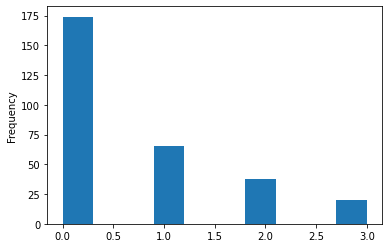

In [11]:
# Histograma de ca
df['ca'].plot.hist()

El rango de esta variable se encuentra entre 0 y 3. Como podemos ver en la gráfica, el pico se encuentra en 0 y su media en 0.93. 

### Estudio de las relaciones 2 a 2 de las variables numéricas ###
Calcularemos el diagrama de dispersión y los coeficientes de correlación de Pearson.

#####  Diagrama de dispersión #####

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trestbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='thalach', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>,
        <AxesSubplot:xlabel='ca', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trestbps'>,
        <AxesSubplot:xlabel='trestbps', ylabel='trestbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trestbps'>,
        <AxesSubplot:xlabel='thalach', ylabel='trestbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trestbps'>,
        <AxesSubplot:xlabel='ca', ylabel='trestbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trestbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalach', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>,
        <AxesSubplot:xlabel='ca', ylabel='chol'>],
       [<AxesSubplot:x

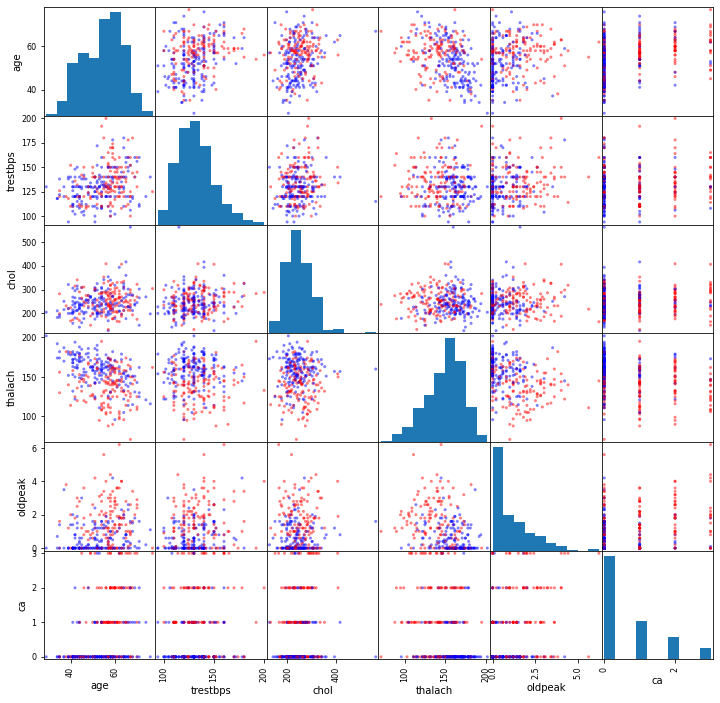

In [12]:
from pandas.plotting import scatter_matrix

# Asignamos el color azul a las personas normales y el rojo a las enfermas
dic_colors = { 'Normal': 'blue', 'Enfermo': 'red' }
colors = df['target'].map(dic_colors)

# Diagrama de dispersión
scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color = colors)

Observando el diagrama de dispersión, vemos que por cada par de variables, no hay ninguna que separe las clases perfectamente, sino que en todos los casos observamos los grupos de puntos azules (personas sanas) y los puntos rojos (personas enfermas) entremezclados entre sí. En general, y como veremos a continuación en los coeficientes de Pearson, significa que no vamos a encontrar relación entre una variable y el hecho de estar sano o enfermo. La única que diferencia de forma más o menos clara los pacientes sanos de los enfermos es el número de vasos sanguíneos principales (ca).


##### Coeficientes de correlación de Pearson #####

In [13]:
# Coeficientes de correlación de Pearson
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


Como podemos ver en los coeficientes de correlación, ningun par de variables tiene una correlación directa o inversa clara, puesto que ninguna está cerca del valor 1 o -1, por lo que no podemos determinar que exista ningún tipo de correlación.

Creemos que el hecho de que no exista una correlación nos va a complicar la resolución del problema a la hora de determinar si alguien está o no enfermo.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

En este caso no es necesario escalar o estandarizar los datos, puesto que vamos a utilizar un árbol de decisión. Esto se debe a la forma en la que se construye el árbol, puesto que en cada nodo se elige un atributo para la obtención de los nodos hijos, y será aquel que de como resultado una menor entropía, es decir, una mejor aproximación de cada individuo a su clase. Por lo tanto, si normalizamos los datos no va a afectar en absoluto por la propia construcción del mismo.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [14]:
RANDOM_STATE=333

In [15]:
datos_entrenamiento = df.drop(['target'], axis=1)
salida = np.array(df['target'])

In [16]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_validate

train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 6)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, datos_entrenamiento, salida, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9147059645592265],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7641379310344828,
  0.763793103448276])

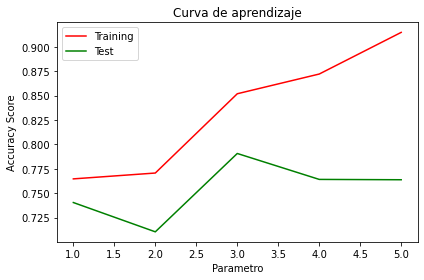

In [17]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show() 

Como observamos en la gráfica, vamos a elegir la profundidad 3 puesto que hay un pico para ambos conjuntos y con mayor profundidad empeora para el de test aunque aumenta para el de entrenamiento.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

In [18]:
# Creamos un árbol de decisión con profundidad máxima 3
clf = DecisionTreeClassifier(random_state = RANDOM_STATE, max_depth = 3)
clf = clf.fit(datos_entrenamiento, salida)

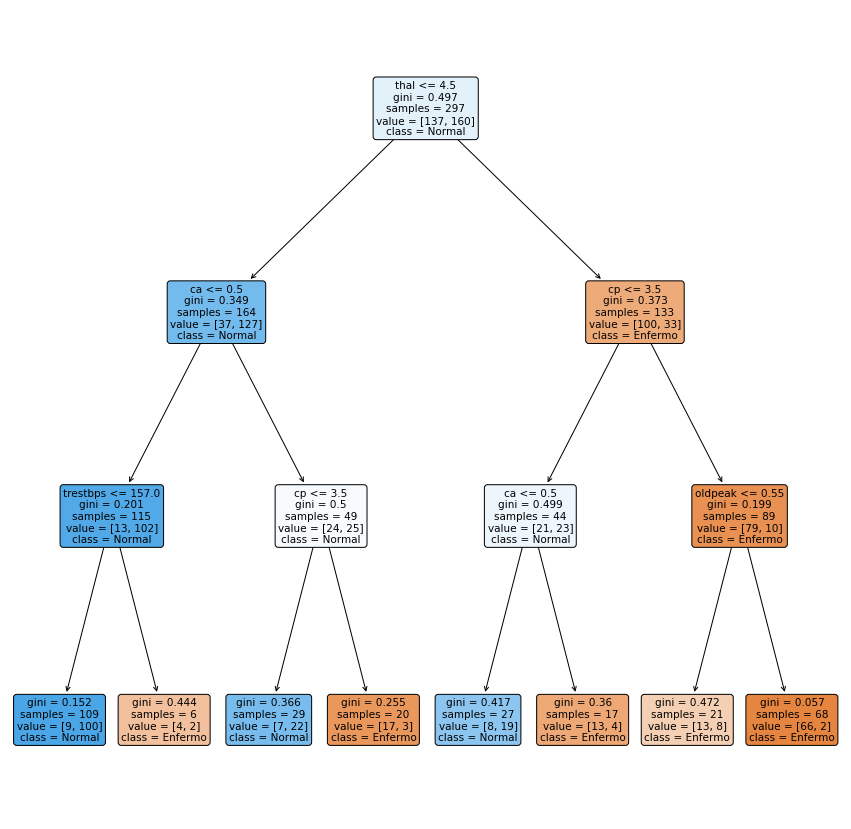

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=datos_entrenamiento.keys(), class_names=['Enfermo', 'Normal'], rounded=True)
plt.show()

##### ¿Cuáles son las variables más importantes y en qué orden?
Las variables más importantes, son las que se ven representadas en el árbol puesto que en cada nuevo nivel del árbol divide en dos subgrupos el grupo del padre. En nuestro caso, estas variables son thal (nivel de talasemia), ca (número de vías principales) y cp (tipo de angina de pecho). Después, en la última division aparecen ca y cp de nuevo junto con trestbps(presión sanguínea en reposo) y oldpeak(depresión ST inducida por el ejercicio en relación al reposo).

##### ¿Hay variables del conjunto de datos que no se han usado?
En cuanto a las demás variables, el árbol no ha hecho uso de las mismas para dividir los distintos grupos.

##### ¿Cuál sería la tasa de aciertos (accuracy) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?
Si sólo se hiciera una pregunta, la tasa de aciertos para personas normales estaría en torno al 65% y para personas enfermas en torno al 63%, puesto que los índices de Gini en los dos primeros hijos, que indican la probabilidad de error, son 0.349 y 0.373.

##### ¿El árbol que hemos construido es capaz de separar las clases?
Observando el valor del índice de Gini, nuestro árbol no es capaz de separar las clases a la perfección, puesto que algunos de sus índices se acercan a 0.5. Sin embargo en otros casos, como por ejemplo el primer hijo empezando por la derecha, el valor de dicho índice está en 0.057, lo cual es bastante bajo. El resto de hojas se encuentra en torno a 0.3, lo cual nos da un porcentaje de error de un 30%.

##### ¿En cuál de los nodos hoja existe mayor confusión?
El nodo hoja con mayor confusión es sin duda el que tiene el índice de Gini más alto (0.472), es el segundo hijo empezando por la derecha, aunque también se le acercan otras hojas con valores similares (0.444 y 0.417).




## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [20]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, datos_entrenamiento, salida, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


En general, nuestro clasificador tiene una precisión de 0.81, lo que quiere decir que acertará aproximadamente 4 de cada 5 veces, el recall (o exhaustividad) tiene un valor de 0.79, un poco menor que la precisión y, puesto que el valor F1 es una combinación de ambos, el valor es 0.78.

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, datos_entrenamiento, salida, cv=10)

# Informe por clases
cr = classification_report(salida,predictions, target_names=['Enfermo', 'Normal'])
print(cr)

              precision    recall  f1-score   support

     Enfermo       0.82      0.71      0.76       137
      Normal       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



Viendo los distintos valores, observamos que nuestro clasificador es algo más preciso con las personas enfermas, pero sin embargo tiene un recall menor, por lo que es capaz de detectar menos personas enfermas del total que sanas. Atendiendo al valor de f1, es más eficaz detectando personas normales a sanas.

Ahora vamos a calcular la matriz de confusión:

In [22]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

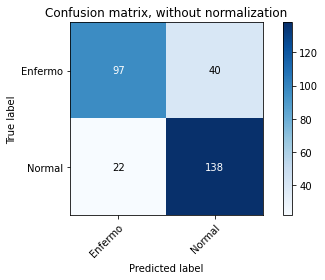

In [23]:
# Creamos la matriz y la mostramos
plot_confusion_matrix(salida, predictions, ['Enfermo', 'Normal'], normalize=False)

Observando la matriz de confusión, del número total de personas enfermas, clasifica 97 en la clase correcta y 40 en la de personas normales. Del número total de personas normales, clasifica 138 correctamente y 22 en la de personas enfermas. Con estos datos, se observa claramente que tiene una mejor tasa de acierto en personas sanas que en enfermas.

#### Conclusión final
Tras haber analizado todos los resultados del árbol, consideramos que para este contexto y, tratándose de un tema tan importante como determinar si una persona está o no está enferma, no es del todo fiable. Creemos que en un hospital podría ser útil para un análisis previo, pero que debería confirmarse por un profesional sanitario, y más teniendo en cuenta que ha considerado a 40 personas sanas cuando no lo estaban. 
El uso de estas herramientas para la salud tiene una clara ventaja, puesto que partiendo de un conjunto de datos, puedes clasificar a una gran velocidad a un gran grupo de pacientes. Pero la desventaja, como hemos comentado, es que no da la fiabilidad que debería en este ámbito.